Assignment 5
----
#### By Orla O'Neill, 18314251

This code deals with a file that has data on a number of stars. It will extract the necessary information from the file and will use that information to plot the Hertzsprung-Russell diagram, or something like it.

## Task 1
In this part. The code will open the data file and will organise it into different arrays for use later.

In [1]:
#reading first line

file=open("StarData.txt","r")
print(file.readline())

    2.00   4.61  +1.04  +0.0135   149   



In [2]:
#reading all lines, returning last line

data=file.readlines()

for line in data:
    columns=line.split()
    
print(line)
print(columns)

 5822.00   7.47  +0.55  +0.0132   111   
['5822.00', '7.47', '+0.55', '+0.0132', '111']


In [3]:
#loading file and splitting up lines

with open("StarData.txt") as data:
    lines=data.read().splitlines()
    
print(lines)

['    2.00   4.61  +1.04  +0.0135   149   ', '    3.00   8.45  +1.05  +0.0717   113   ', '    4.00   9.01  +1.44  +0.0886   023   ', '    6.00   8.60  +0.94  +0.0147   055   ', '    7.00   5.96  +0.67  +0.0455   050   ', '    7.00   6.43  +0.64  +0.0455   050   ', '    8.00   5.70  +0.52  +0.0495   097   ', '    8.00   5.69  +0.52  +0.0495   097   ', '    9.00   6.13  +0.75  +0.0664   063   ', '    9.01  13.74  +1.99  +0.2130   036   ', '    9.11  14.17  +1.49  +0.0535   025   ', '   10.00   8.37  +0.65  +0.0075   119   ', '   11.00   8.70  +0.80  +0.0392   150   ', '   11.01  13.07  +1.52  +0.0440   063   ', '   12.00   2.06  -0.11  +0.0270   079   ', '   13.00   6.19  +0.48  +0.0462   072   ', '   16.00   2.27  +0.34  +0.0695   066   ', '   16.10  11.80  +1.48  +0.0575   101   ', '   17.00   7.01  +0.92  +0.0327   105   ', '   17.02  13.73  +1.39  +0.0193   030   ', '   18.00   5.42  +0.42  +0.0213   149   ', '   18.00   6.12  +0.44  +0.0213   149   ', '   19.00   3.88  +1.03  +0.064

In [4]:
#setting up data arrays to recieve data from the columns

#empty arrays for the data
StarID=[]
ApparentVMag=[]
Colour=[]
Parallax=[]
ParallaxUncertainty=[]

#filling the arrays with the data
for line in lines:
    columns=line.split()
    StarID.append(columns[0])
    ApparentVMag.append(columns[1])
    Colour.append(columns[2])
    Parallax.append(columns[3])
    ParallaxUncertainty.append(columns[4])


## Task 2

In this part, the code plots the apparent magnitude of the star vs. its colour. It does this by first converting the necessary arrays of strings to arrays of floats and then using matplotlib to plot them.

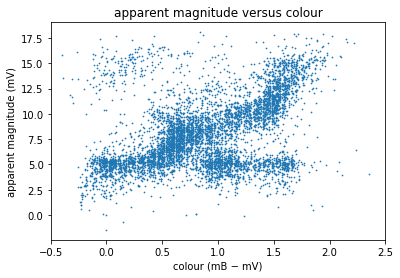

In [9]:
#scatter plot of apparent magnatude vs. colour

#importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

#converting the arrays of strings to arrays of floats
y=np.asarray(ApparentVMag, dtype=np.float64, order='C')
x=np.asarray(Colour, dtype=np.float64, order='C')

#plot code
plt.scatter(x,y,s=0.5)
plt.title("apparent magnitude versus colour")
plt.xlabel("colour (mB − mV)")
plt.ylabel("apparent magnitude (mV)")
plt.xlim(-0.5,2.5)
plt.show()

## Task 3

Absolute magnatude (M) can be calulated from apparent magnitude (m) as follows:
$$m-M=5log(\frac{d}{10})$$
Where d is the disatnce from Earth to the star in parsecs.

The distance is calculated with the parallax angle
$$d=\frac{1}{p}$$

Using this information, the code calculates the absolute magnitude and plots it against colour to get the Hertzsprung-Russell diagram.

Then, it counts the number of red giants, main series and white dwarf stars that can be seen on the graph.

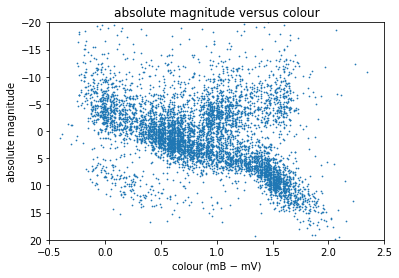

In [6]:
#calculating absolute magnitude and plotting 

#conveting array of strings to floats
Parallax=np.asarray(Parallax, dtype=np.float64, order='C')

#calcuating distance
d=1/Parallax
#calculating absolute magnitude
AbMag=y-5*np.log(d/10)

#plot code
plt.scatter(x,AbMag,s=0.5)
plt.title("absolute magnitude versus colour")
plt.xlabel("colour (mB − mV)")
plt.ylabel("absolute magnitude")
plt.xlim(-0.5,2.5)
plt.ylim(-20,20)
plt.gca().invert_yaxis()
plt.show()

In [7]:
#counting star types

#star type count starts at 0
RedCount=0
MainCount=0
WhiteCount=0

#arrays of star types for part 4
RedGiantsX=[]
RedGiantsMag=[]
MainSequenceX=[]
MainSequenceMag=[]
WhiteDwarfsX=[]
WhiteDwarfsMag=[]

#red giant
for i in range(len(x)):
    if 0.75<=x[i]<=1.75 and -12.5<=AbMag[i]<=-2.5:
        
        #adding the star to the count
        RedCount=RedCount+1
        
        #adding the star to the arrays
        RedGiantsX.append(x[i])
        RedGiantsMag.append(AbMag[i])

#main squence
#it was counted in 3 different for loops as the main sequence is not much of a rectangle
for i in range(len(x)):
    if -.25<=x[i]<=.75 and -10<=AbMag[i]<=5:
        
        #adding the star to the count
        MainCount=MainCount+1
        
        #adding the star to the arrays
        MainSequenceX.append(x[i])
        MainSequenceMag.append(AbMag[i])
        
for i in range(len(x)):
    if .75<x[i]<1.2 and -2<=AbMag[i]<=5:
        
        #adding the star to the count
        MainCount=MainCount+1
        
        #adding the star to the arrays
        MainSequenceX.append(x[i])
        MainSequenceMag.append(AbMag[i])
        
for i in range(len(x)):
    if 1.2<=x[i]<=2 and -2.5<=AbMag[i]<=15:
        
        #adding the star to the count
        MainCount=MainCount+1
        
        #adding the star to the arrays
        MainSequenceX.append(x[i])
        MainSequenceMag.append(AbMag[i])

#whitedwarf
for i in range(len(x)):
    if -0.25<=x[i]<=1 and 5<=AbMag[i]<=15:
        
        #adding the star to the count
        WhiteCount=WhiteCount+1
        
        #adding the star to the arrays
        WhiteDwarfsX.append(x[i])
        WhiteDwarfsMag.append(AbMag[i])

#returning results
print("The number of red giants is",RedCount)
print("The number of main squence stars is",MainCount)        
print("The number of white dwarfs is",WhiteCount)        

The number of red giants is 869
The number of main squence stars is 4512
The number of white dwarfs is 353


To get the ranges for the different star types, the coder compaired the plot above to the Hertzsprung-Russell diagram and tried to find where each group started and ended. This could mean that stars were left out or stars may have been counted twice in different groups.

## Task 4

In this part, the code plots the scatter in part 3 again, but this time it colours the stars based off of if they are red giants, main squence or white dwarf stars. It also adds the scale of luminosity, in units of Solar Luminosities, to the plot so that we can compair the brightness of the stars to that of the sun.

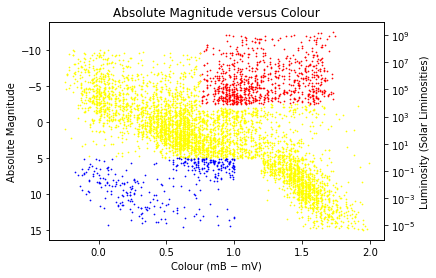

In [8]:
#adding right y-axis and colour to the plot

#plotting each type with a different color
plt.scatter(RedGiantsX,RedGiantsMag,s=0.5,c="red")
plt.scatter(MainSequenceX,MainSequenceMag,s=0.5,c="yellow")
plt.scatter(WhiteDwarfsX,WhiteDwarfsMag,s=0.5,c="blue")


#plot code
plt.title("Absolute Magnitude versus Colour")
plt.xlabel("Colour (mB − mV)")
plt.ylabel("Absolute Magnitude")
plt.gca().invert_yaxis()

#creating right y-axis
rightAxis=plt.twinx()
rightAxis.set_ylim(8.77*10**-7,8.55*10**9)
rightAxis.set_ylabel("Luminosity (Solar Liminosities)")
rightAxis.semilogy()
plt.show()

The predicted weakness in the coders method from part 3 is highlighted in this plot. It is clear to see that some of the main squence stars have been incorrectly counted as red giants and white dwarfs.